# wyniki testów

In [1]:
import sys
sys.path.append('../main_model')
# autorskie ploty :P

from plots import barplot
from some_functions import *
from popularity_model import *
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
results = get_db('res_f1.csv')
results.drop_duplicates(inplace=True)


In [3]:
# dodanie f1score

# results['f1score'] = results[['precision','recall']].apply(lambda x: f1score(x[0],x[1]), axis=1)
# results.to_csv("res_f1.csv", encoding="utf-8", index=False)

In [3]:
# usuwam outliersy
results = results[(results['test_articles'] > 2) & (results['train_articles'] > 2)]

results.head(1)

,model,user,number_of_recomm,train_articles,test_articles,precision,recall,weight,f1score
6,final,3,5,9,5,0.0,0.0,"(1, 1, 1)",0.0


### f1 score for different weight

In [4]:
# do średnich
rr = results.groupby(['weight','number_of_recomm'])[['precision','recall','f1score']].mean().reset_index()

names = list(rr['weight'])
n = len(names)
rr.head()

,weight,number_of_recomm,precision,recall,f1score
0,"(1, 1, 1)",5,0.081789,0.033123,0.022268
1,"(1, 1, 1)",10,0.067433,0.053013,0.027977
2,"(1, 1, 1)",15,0.061651,0.071530,0.031202
3,"(1, 1, 50)",5,0.046673,0.019218,0.012743
4,"(1, 1, 50)",10,0.041320,0.032822,0.017165


In [7]:
# rr[rr['number_of_recomm'] == 5 ]['precision']

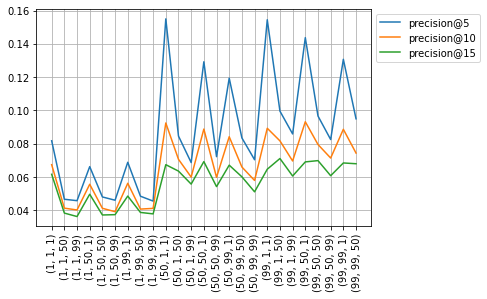

In [5]:
plt.plot(np.arange(n/3),rr[rr['number_of_recomm'] == 5 ]['precision'], label='precision@5')
plt.plot(np.arange(n/3),rr[rr['number_of_recomm'] == 10 ]['precision'], label='precision@10')
plt.plot(np.arange(n/3),rr[rr['number_of_recomm'] == 15 ]['precision'], label='precision@15')
plt.legend(bbox_to_anchor=(1, 1, 0, 0))
plt.xticks(ticks=np.arange(n/3),labels=names[::3], rotation=90)
plt.grid()
plt.show()

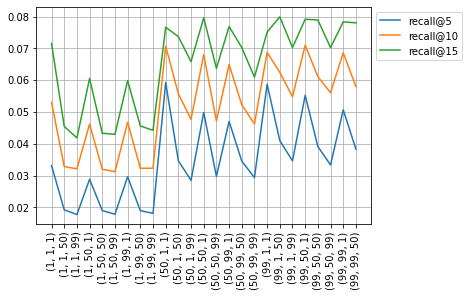

In [6]:
plt.plot(np.arange(n/3),rr[rr['number_of_recomm'] == 5 ]['recall'], label='recall@5')
plt.plot(np.arange(n/3),rr[rr['number_of_recomm'] == 10 ]['recall'], label='recall@10')
plt.plot(np.arange(n/3),rr[rr['number_of_recomm'] == 15 ]['recall'], label='recall@15')
plt.legend(bbox_to_anchor=(1, 1, 0, 0))
plt.xticks(ticks=np.arange(n/3),labels=names[::3], rotation=90)
plt.grid()
plt.show()

#### % of users without recommendation for model

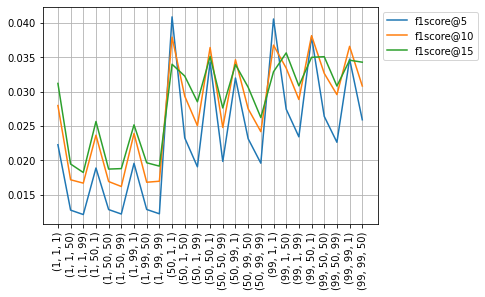

In [7]:
plt.plot(np.arange(n/3),rr[rr['number_of_recomm'] == 5 ]['f1score'], label='f1score@5')
plt.plot(np.arange(n/3),rr[rr['number_of_recomm'] == 10 ]['f1score'], label='f1score@10')
plt.plot(np.arange(n/3),rr[rr['number_of_recomm'] == 15 ]['f1score'], label='f1score@15')
plt.legend(bbox_to_anchor=(1, 1, 0, 0))
plt.xticks(ticks=np.arange(n/3),labels=names[::3], rotation=90)
plt.grid()
plt.show()